In [63]:
### Imports des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

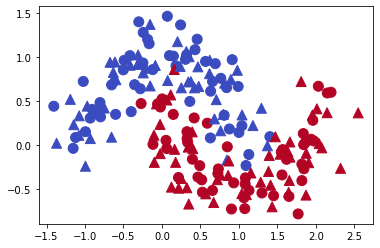

In [64]:
### Simulation de données en deux dimensions séparables linéairement
from sklearn.datasets import make_moons
X_train, y_train = make_moons(noise = 0.2, random_state = 33, n_samples = 100)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'coolwarm', s = 100)
X_test, y_test = make_moons(noise = 0.2, random_state = 42, n_samples = 100)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'coolwarm', s = 100, marker = '^')

In [65]:
### Fonction permettant de visualiser les frontières de décisions

def plot_boundary(clf, X, y):
    h = 0.002
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, cmap = 'cool', alpha = 0.75)

    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'coolwarm', s = 100)
    #plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$X^1$')
    plt.ylabel('$X^2$')

In [66]:
### Procédure d'estimation d'un SVM pour différentes valeurs de C et 
### -> différentes fenêtres du noyau RBF (gamma)
### -> différentes degré d'un noyau polynomial (degree)
### -> GridSearchCV

parameters = [
    {'kernel': ['rbf'], 'gamma': np.logspace(-2, 1, 4), 'C': np.logspace(0, 4, 5)},
    {'kernel': ['poly'], 'degree': [1, 2, 3, 4], 'C': np.logspace(-2, 2, 5)}
]
score = 'accuracy' #recall

# using grid search
model = GridSearchCV(estimator=SVC(),param_grid=parameters,scoring=score)

# fitting the model for grid search
model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                          'kernel': ['rbf']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'degree': [1, 2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [67]:
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        model.cv_results_['mean_test_score'], # score moyen
        model.cv_results_['std_test_score'],  # écart-type du score
        model.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        'accuracy',
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.780 (+/-0.136) for {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy = 0.830 (+/-0.102) for {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy = 0.900 (+/-0.141) for {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy = 0.930 (+/-0.049) for {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}
accuracy = 0.830 (+/-0.102) for {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy = 0.850 (+/-0.141) for {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy = 0.940 (+/-0.075) for {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy = 0.920 (+/-0.136) for {'C': 10.0, 'gamma': 10.0, 'kernel': 'rbf'}
accuracy = 0.850 (+/-0.126) for {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy = 0.880 (+/-0.185) for {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy = 0.920 (+/-0.080) for {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy = 0.920 (+/-0.136) for {'C': 100.0, 'gamma': 10.0, 'kernel': 'rbf'}
accuracy = 0.830 (+/-0.136) for {'C': 1000.0, 'gamma': 0.

# Réglage des hyper-paramètres en fonction de accuracy

Résultats de validation sur l'ensemble des paramètres:
make_scorer(accuracy_score)
0.95
SVC(C=1000.0, gamma=1.0)
Meilleurs hyperparamètres sur le jeu d'entraînement:
{'C': 1000.0, 'gamma': 1.0, 'kernel': 'rbf'}

Frontière de décision:


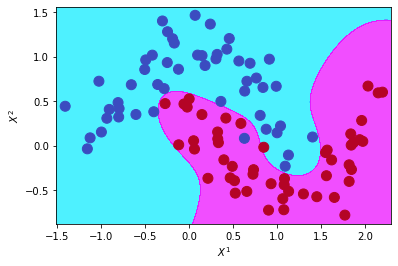

In [68]:
print("# Réglage des hyper-paramètres en fonction de %s" % score)
print()

print("Résultats de validation sur l'ensemble des paramètres:")
print(model.scorer_)
print(model.best_score_)
print(model.best_estimator_)

print("Meilleurs hyperparamètres sur le jeu d'entraînement:") 
print(model.best_params_)
print()

print("Frontière de décision:")
# plot_boundary(...)
plot_boundary(model, X_train, y_train)

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.96      0.86      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

------------------------------------------------------
Accuracy score:
0.91
------------------------------------------------------
Matrice de confusion:


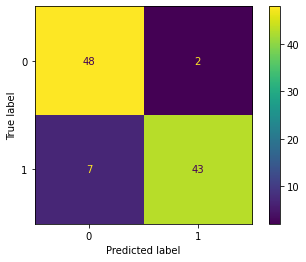

In [69]:
print("Rapport de classification sur l'ensemble de test:")
print()
y_true = y_test
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))
result2 = accuracy_score(y_test,y_pred)
print("------------------------------------------------------")
print("Accuracy score:",)
print(result2)
print("------------------------------------------------------")
print("Matrice de confusion:")
plot_confusion_matrix(model, X_test, y_test)

Partie 2

In [70]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [71]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.01, 'gamma': 10.0} with a score of 0.91


In [72]:
# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))


<ipython-input-80-faeaa845d97d>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-80-faeaa845d97d>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-80-faeaa845d97d>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X an

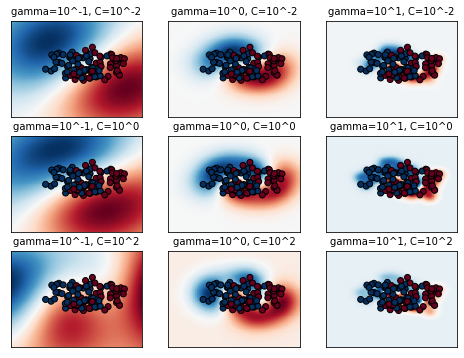

In [80]:
# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    # visualize points
    plt.scatter(X_train[:, 0], X_test[:, 1], c=y_train, cmap=plt.cm.RdBu_r, edgecolors="k")
    
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

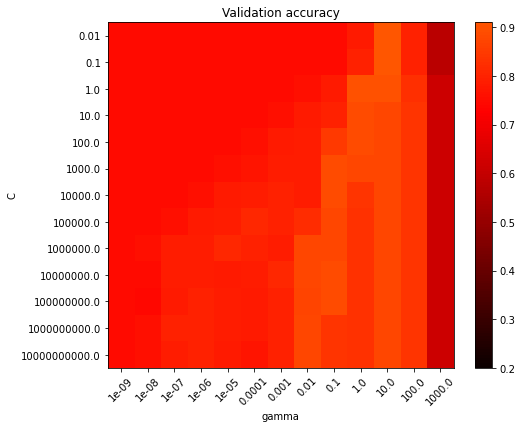

In [74]:
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()